In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import yfinance as yf
import datetime

# Fetch historical stock data
stock_symbol = 'AAPL'  # Example stock symbol for Apple Inc.
start_date = '2020-01-01'
end_date = str(datetime.date.today())
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Use only the 'Close' column
data = data[['Close']]

# To avoid the warning, use .loc to modify the DataFrame directly
data.loc[:, 'Prediction'] = data['Close'].shift(-n)

# Create the feature dataset (X) and convert it to a numpy array and remove the last 'n' rows/days
n = 30  # Number of days to predict in the future
X = np.array(data.drop(['Prediction'], axis=1))[:-n]

# Create the target dataset (y) and convert it to a numpy array and get all of the target values except the last 'n' rows/days
y = np.array(data['Prediction'])[:-n]

# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Testing model: Score returns the coefficient of determination R^2 of the prediction.
print(f'Model Accuracy: {model.score(x_test, y_test)}')

# Predict the next 'n' days stock prices
x_future = data.drop(['Prediction'], axis=1)[-n:]
x_future = x_future.tail(n)
x_future = np.array(x_future)
forecast = model.predict(x_future)

print("Forecast for the next", n, "days:", forecast)


[*********************100%%**********************]  1 of 1 completed

Model Accuracy: 0.855941137772437
Forecast for the next 30 days: [179.8062688  183.69625533 183.32324496 184.25577765 183.72289796
 184.01598043 181.98218292 181.13845448 186.42280186 189.02499806
 191.09432811 192.24000184 191.63608417 191.34300169 189.78878506
 189.17597748 185.89879853 182.66602848 184.85081896 183.95381882
 185.57907342 187.01784318 187.11553733 186.14748566 186.61819018
 185.1083689  183.23442716 182.44399753 182.1864476  180.80985302]



C:\Users\Bill\AppData\Local\Temp\ipykernel_47668\1511815965.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Prediction'] = data['Close'].shift(-n)


c:\Users\Bill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


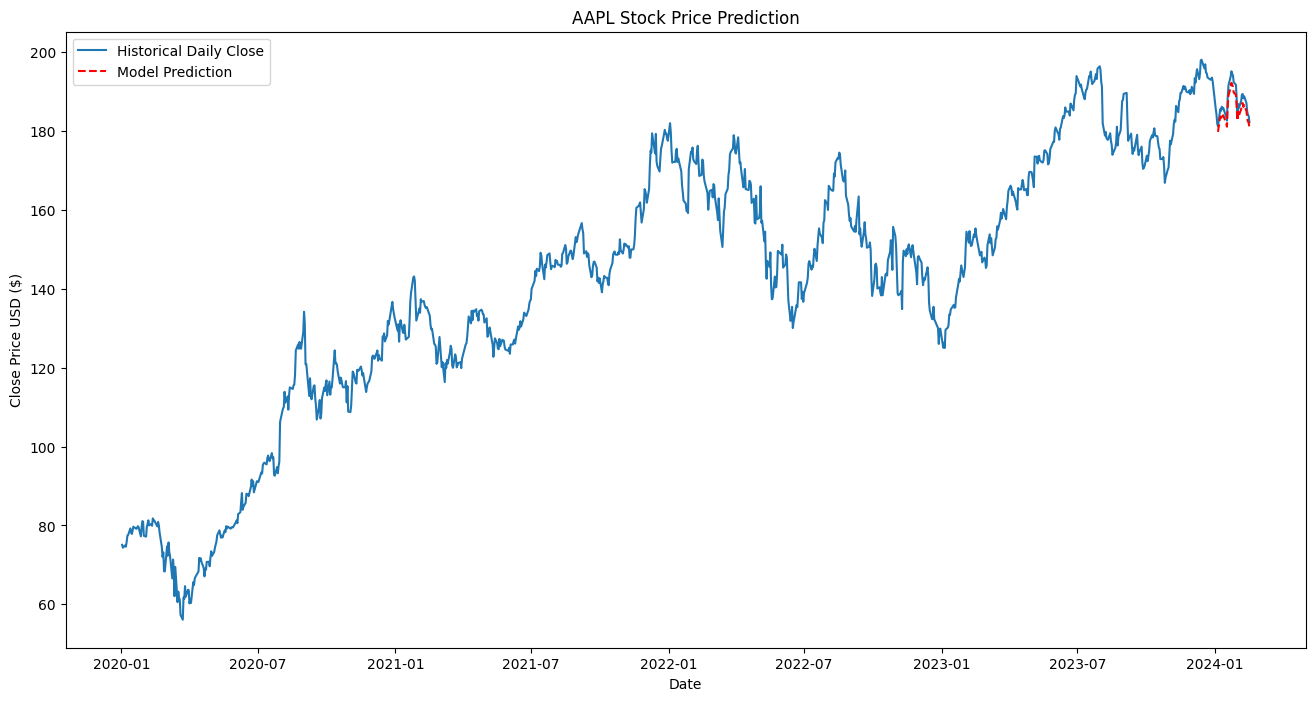

In [4]:
import matplotlib.pyplot as plt

# Existing code for fetching data, preparing datasets, and training the model...

# Predict the next 'n' days stock prices
x_future = data.drop(['Prediction'], axis=1)[-n:]
x_future_dates = data.index[-n:]  # Get the dates for the future predictions
forecast = model.predict(x_future)

# Plotting
plt.figure(figsize=(16,8))
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')

# Plot the historical closing prices
plt.plot(data.index, data['Close'], label='Historical Daily Close')

# Plot the predicted prices
# Since x_future_dates are the last 'n' dates in the dataset, we'll append them for visualization
plt.plot(x_future_dates, forecast, label='Model Prediction', linestyle='--', color='r')

plt.legend()
plt.show()
